# 1.データのダウンロード
### 1.1.ライブラリのインポート

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 1.2.データセットのダウンロード

In [29]:
#データセットをダウンロード
df_data = pd.read_csv('./input.csv')
#インデックスをhorse_idとする
df_data = df_data.set_index(["horse_id"])

In [30]:
df_data

,2試合前,3試合前,4試合前,5試合前,6試合前,7試合前,8試合前,9試合前,10試合前,11試合前,target
horse_id,,,,,,,,,,,
1998100265,0.875000,0.764706,0.769231,0.928571,0.588235,0.312500,0.062500,0.437500,0.090909,1.000000,0.0
1998105844,0.812500,0.812500,0.875000,0.866667,0.812500,0.888889,0.888889,1.000000,0.400000,0.375000,0.0
1999100207,0.888889,0.888889,1.000000,0.312500,0.562500,0.642857,0.125000,0.222222,0.555556,0.277778,0.0
1999104268,0.642857,0.666667,0.818182,1.000000,0.187500,0.625000,0.533333,0.923077,0.647059,0.333333,0.0
1999104764,0.400000,0.444444,0.272727,0.300000,0.333333,0.400000,0.100000,0.888889,0.125000,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020110109,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020110110,0.916667,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020110119,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [31]:
#欠損値確認
df_data.isnull().sum()

2試合前        695
3試合前       3547
4試合前       6489
5試合前       9163
6試合前      11623
7試合前      14026
8試合前      16088
9試合前      18119
10試合前     20018
11試合前     21848
target        0
dtype: int64

In [32]:
#欠損地を0.5で穴埋め
df_data.fillna(0.5,inplace=True)

In [33]:
#欠損値確認
df_data.isnull().sum()

2試合前      0
3試合前      0
4試合前      0
5試合前      0
6試合前      0
7試合前      0
8試合前      0
9試合前      0
10試合前     0
11試合前     0
target    0
dtype: int64

In [34]:
#特徴量とターゲットに分割
df_x = df_data.iloc[:,0:-1]
df_y = df_data.iloc[:,-1]

# 2.特徴量エンジニアリング
### 2.1.データ加工

In [98]:
#20%をテストデータ、80%を学習・バリデーションデータに分割
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)

#説明変数の標準化
scaler_X = StandardScaler()
x_train = scaler_X.fit_transform(x_train)
x_test = scaler_X.transform(x_test)

### 2.2.特徴量同士の関係を確認

C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35430 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35430 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_

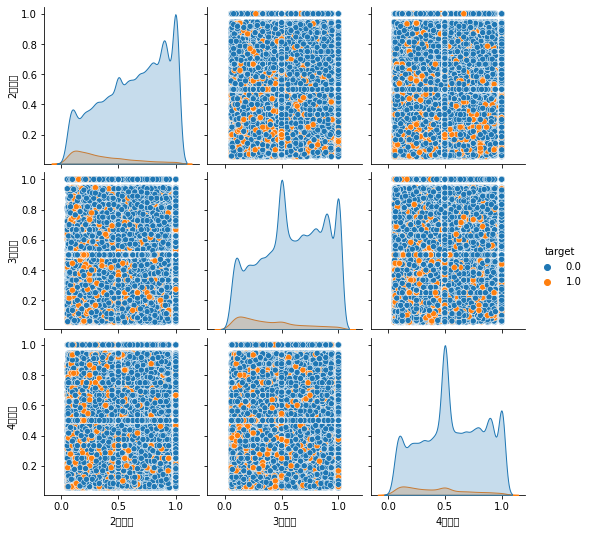

In [37]:
#いくつかの変数で変数同士の関係性を見てみる。
sns.pairplot(df_data,vars = ['2試合前','3試合前','4試合前'],hue="target")
plt.show()

C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35430 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35430 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_

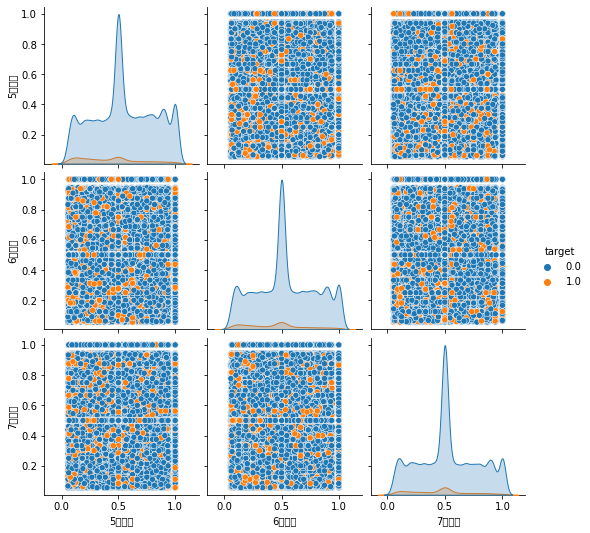

In [38]:
#いくつかの変数で変数同士の関係性を見てみる。
sns.pairplot(df_data,vars = ['5試合前','6試合前','7試合前'],hue="target")
plt.show()

C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35430 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35430 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hori\Documents\anaconda3\lib\site-packages\matplotlib\backends\backend_

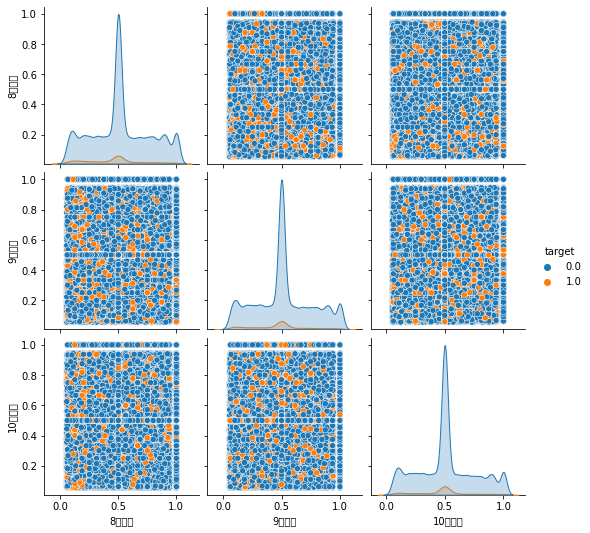

In [39]:
#いくつかの変数で変数同士の関係性を見てみる。
sns.pairplot(df_data,vars = ['8試合前','9試合前','10試合前'],hue="target")
plt.show()

In [40]:
#上図より、targetと相関があるのは2～6試合前の結果
#したがって、特徴量としては2～6試合前の結果を選定

In [114]:
x_train2 = x_train[:,0:5]
x_test2  = x_test[:,0:5]

# 3.モデル作成

In [124]:
model = LogisticRegression() 
params_grid = {
    'C': [1e-2, 1e-1, 1, 1e1, 1e2]
}
search = GridSearchCV(model, params_grid, cv=5)
search.fit(x_train2,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10.0, 100.0]})

# 4.予測の評価
### 4.1.結果の表示

In [125]:
results = pd.DataFrame(search.cv_results_)
display(results)
bestparam = search.best_params_
print("best parameter is {}".format(bestparam))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020805,0.000749,0.001001,9.047349e-07,0.01,{'C': 0.01},0.931861,0.931861,0.931861,0.931861,0.931767,0.931842,0.000038,1
1,0.020805,0.001166,0.001000,1.168008e-07,0.1,{'C': 0.1},0.931861,0.931861,0.931861,0.931861,0.931767,0.931842,0.000038,1
2,0.021005,0.001096,0.000800,4.001379e-04,1,{'C': 1},0.931861,0.931861,0.931861,0.931861,0.931767,0.931842,0.000038,1
3,0.021605,0.001357,0.000800,3.998998e-04,10.0,{'C': 10.0},0.931861,0.931861,0.931861,0.931861,0.931767,0.931842,0.000038,1
4,0.020605,0.000800,0.001000,9.536743e-08,100.0,{'C': 100.0},0.931861,0.931861,0.931861,0.931861,0.931767,0.931842,0.000038,1


best parameter is {'C': 0.01}


In [126]:
#訓練データ,テストデータに対する予測
y_pred_train = search.predict(x_train2)
y_pred_test = search.predict(x_test2)

スレッショルド　：　[1.39893783 0.39893783 0.38489754 ... 0.00538642 0.00537543 0.00522391]


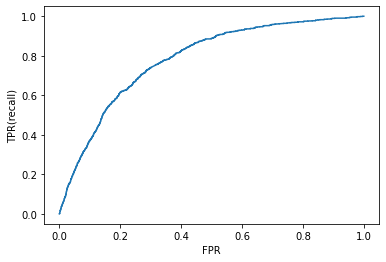

AUC = 0.7826984814904983


In [129]:
#fpr:偽陽性率（陰性のものの中で、陽性と予想したものの比率）
#tpr:真陽性率（陽性と予想したものの中で、陽性のものの比率）
fpr, tpr, thresholds = roc_curve(y_test, search.predict_proba(x_test2)[:,1])
print("スレッショルド　：　{}".format(thresholds))
#ROC Curveの描画
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()
#テストデータのAUCの計算　←精度の評価として用いればよい
auc = roc_auc_score(y_test, search.predict_proba(x_test2)[:, 1])
print("AUC = {}".format(auc))

# メトリックについて
モデルの評価はROCカーブの面積で評価すればよいと考えている。
また、スレッショルドは再現率(precision)が高くなるように設定すればよいのでは？

In [138]:
thresholds

array([1.39893783, 0.39893783, 0.38489754, ..., 0.00538642, 0.00537543,
       0.00522391])

In [139]:
best_score = 0.0
best_threshold = 0.0
for i in thresholds:
    each_y_pred_test = (search.predict_proba(x_test2)[:,1] > i) * 1
    if best_score < precision_score(y_true=y_test, y_pred=each_y_pred_test):
        best_threshold = i
        best_score = precision_score(y_true=y_test, y_pred=each_y_pred_test)
print('BEST THRESHOLD : ',best_threshold)
print('BEST PRECISION：',best_score)

C:\Users\hori\Documents\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hori\Documents\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BEST THRESHOLD :  0.34737265952289387
BEST PRECISION： 0.34375


In [140]:
thre = 0.34737265952289387
thre_y_pred_test = (search.predict_proba(x_test2)[:,1] > thre) * 1
print('precision：', precision_score(y_true=y_test, y_pred=thre_y_pred_test))
print('recall：', recall_score(y_true=y_test, y_pred=thre_y_pred_test))
print('f1 score：', f1_score(y_true=y_test, y_pred=thre_y_pred_test))
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=thre_y_pred_test))

precision： 0.34375
recall： 0.011904761904761904
f1 score： 0.023012552301255224
confusion matrix = 
 [[12355    21]
 [  913    11]]


# 結論
### モデルの評価　：　AUC = 0.78
### 的中率　：　precision = 0.34
##### ランダムに予測するモデルでは的中率が17%であることを考慮すると、本モデルはまぁまぁ良いのかもしれない。